In [1]:
package = "../../"
import sys
import os
package = os.path.abspath(package)
sys.path.append(package)


In [ ]:
import numpy as np
import torch
import logging
import sys
import os
import pytest
import glob
from src.trainer.flux_kontext_trainer import FluxKontextLoraTrainer
from src.data.config import load_config_from_yaml
from src.data.dataset import loader
from diffusers.utils import load_image

/home/lilong/.local/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s: %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)],
    force=True,  # 关键：覆盖已有配置
)
logger = logging.getLogger(__name__)
logger.info("it works")

2025-10-17 00:37:43,808 | INFO | __main__: it works


# 1. Flux Kontext

# 1.1 Single control

## 1.1.1 Without Lora

In [4]:
IMAGE_PATH='https://n.sinaimg.cn/ent/transform/775/w630h945/20201127/cee0-kentcvx8062290.jpg'
prompt='change the hair color to dark blue'
prompt_image = load_image(IMAGE_PATH)

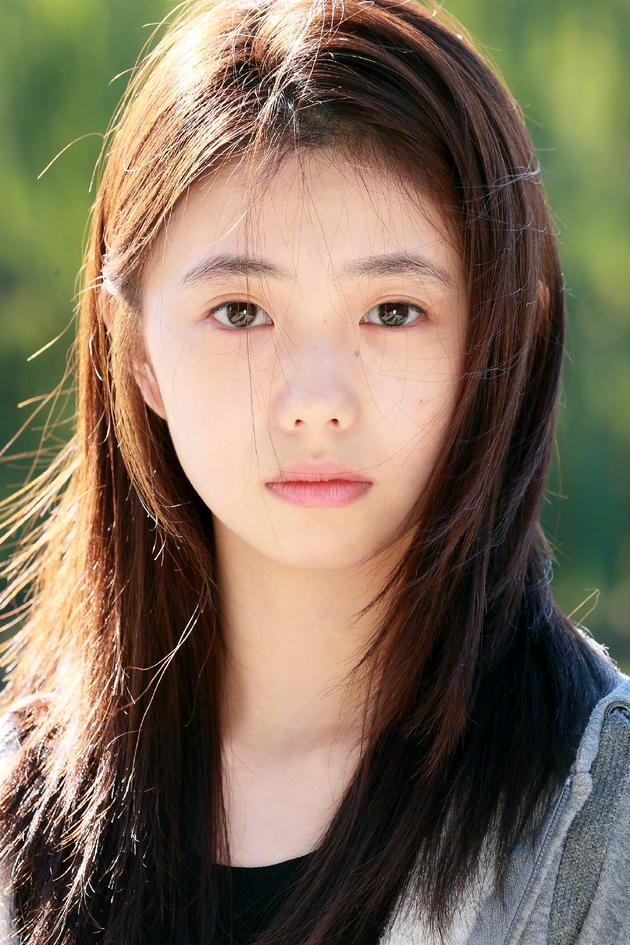

In [5]:
prompt_image

In [6]:
prompt_image.size

(630, 945)

In [7]:
config="../../tests/test_configs/test_example_fluxkontext_fp16.yaml"
config = load_config_from_yaml(config)
config.model.pretrained_model_name_or_path='lrzjason/flux-kontext-nf4'

In [8]:
trainer = FluxKontextLoraTrainer(config)

2025-10-17 00:37:44,600 | INFO | src.trainer.base_trainer: Batch Size: 2
2025-10-17 00:37:44,600 | INFO | src.trainer.base_trainer: Use Cache: True
2025-10-17 00:37:44,602 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]target_pixels: Nonecontrols_pixels: None


In [9]:
config

Config(trainer=<TrainerKind.FluxKontext: 'FluxKontext'>, resume=None, mode=<TrMode.predict: 'predict'>, model=ModelConfig(pretrained_model_name_or_path='lrzjason/flux-kontext-nf4', pretrained_embeddings=None, lora=LoraConfig(r=16, lora_alpha=16, init_lora_weights='gaussian', target_modules=['to_k', 'to_q', 'to_v', 'to_out.0'], pretrained_weight=None, adapter_name='lora_edit'), quantize=False), data=DataConfig(class_path='src.data.dataset.ImageDataset', init_args=DatasetInitArgs(dataset_path=[{'split': 'train', 'repo_id': 'TsienDragon/face_segmentation_20'}], caption_dropout_rate=0.0, prompt_image_dropout_rate=0.0, cache_dir='/tmp/image_edit_lora/faceSegFluxKontextFp16/cache', use_cache=True, use_edit_mask=True, selected_control_indexes=[1], prompt_empty_drop_keys=['prompt_embeds', 'pooled_prompt_embeds'], processor=ImageProcessorConfig(class_path='src.data.preprocess.ImageProcessor', init_args=ImageProcessorInitArgs(process_type='center_crop', resize_mode='bilinear', target_size=[832, 

In [10]:
out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=945,
    width=630,
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-10-17 00:37:44,612 | INFO | root: Loading model...
2025-10-17 00:37:44,613 | INFO | root: Loading FluxKontextPipeline and separating components...
2025-10-17 00:37:44,613 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext VAE from lrzjason/flux-kontext-nf4
configs {'_class_name': 'AutoencoderKL', '_diffusers_version': '0.34.0.dev0', '_name_or_path': '/raid/.cache/huggingface/models--black-forest-labs--FLUX.1-dev/snapshots/0ef5fff789c832c5c7f4e127f94c8b54bbcced44/vae', 'act_fn': 'silu', 'block_out_channels': [128, 256, 512, 512], 'down_block_types': ['DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D'], 'force_upcast': True, 'in_channels': 3, 'latent_channels': 16, 'latents_mean': None, 'latents_std': None, 'layers_per_block': 2, 'mid_block_add_attention': True, 'norm_num_groups': 32, 'out_channels': 3, 'sample_size': 1024, 'scaling_factor': 0.3611, 'shift_factor': 0.1159, 'up_block_types': ['UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDe

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00, 59.35it/s]


configs {'_class_name': 'FluxTransformer2DModel', '_diffusers_version': '0.33.1', '_name_or_path': 'F:/T2ITrainer/flux_models/kontext_full/', 'attention_head_dim': 128, 'axes_dims_rope': [16, 56, 56], 'guidance_embeds': True, 'in_channels': 64, 'joint_attention_dim': 4096, 'num_attention_heads': 24, 'num_layers': 19, 'num_single_layers': 38, 'out_channels': None, 'patch_size': 1, 'pooled_projection_dim': 768, 'quantization_config': {'_load_in_4bit': True, '_load_in_8bit': False, 'bnb_4bit_compute_dtype': 'float32', 'bnb_4bit_quant_storage': 'uint8', 'bnb_4bit_quant_type': 'nf4', 'bnb_4bit_use_double_quant': False, 'llm_int8_enable_fp32_cpu_offload': False, 'llm_int8_has_fp16_weight': False, 'llm_int8_skip_modules': None, 'llm_int8_threshold': 6.0, 'load_in_4bit': True, 'load_in_8bit': False, 'quant_method': 'bitsandbytes'}}
guidance_embeds: True
2025-10-17 00:37:48,340 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext tokenizers from lrzjason/flux-kontext-nf4


You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


2025-10-17 00:37:49,643 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext scheduler from lrzjason/flux-kontext-nf4


Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:01,  5.34it/s]

configs {'_class_name': 'AutoencoderKL', '_diffusers_version': '0.34.0.dev0', '_name_or_path': '/raid/.cache/huggingface/models--black-forest-labs--FLUX.1-dev/snapshots/0ef5fff789c832c5c7f4e127f94c8b54bbcced44/vae', 'act_fn': 'silu', 'block_out_channels': [128, 256, 512, 512], 'down_block_types': ['DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D'], 'force_upcast': True, 'in_channels': 3, 'latent_channels': 16, 'latents_mean': None, 'latents_std': None, 'layers_per_block': 2, 'mid_block_add_attention': True, 'norm_num_groups': 32, 'out_channels': 3, 'sample_size': 1024, 'scaling_factor': 0.3611, 'shift_factor': 0.1159, 'up_block_types': ['UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDecoderBlock2D'], 'use_post_quant_conv': False, 'use_quant_conv': False}


Loading pipeline components...:  57%|█████▋    | 4/7 [00:00<00:00, 12.33it/s]

configs {'_class_name': 'FluxTransformer2DModel', '_diffusers_version': '0.33.1', '_name_or_path': 'F:/T2ITrainer/flux_models/kontext_full/', 'attention_head_dim': 128, 'axes_dims_rope': [16, 56, 56], 'guidance_embeds': True, 'in_channels': 64, 'joint_attention_dim': 4096, 'num_attention_heads': 24, 'num_layers': 19, 'num_single_layers': 38, 'out_channels': None, 'patch_size': 1, 'pooled_projection_dim': 768, 'quantization_config': {'_load_in_4bit': True, '_load_in_8bit': False, 'bnb_4bit_compute_dtype': 'float32', 'bnb_4bit_quant_storage': 'uint8', 'bnb_4bit_quant_type': 'nf4', 'bnb_4bit_use_double_quant': False, 'llm_int8_enable_fp32_cpu_offload': False, 'llm_int8_has_fp16_weight': False, 'llm_int8_skip_modules': None, 'llm_int8_threshold': 6.0, 'load_in_4bit': True, 'load_in_8bit': False, 'quant_method': 'bitsandbytes'}}
guidance_embeds: True


Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

2025-10-17 00:37:53,300 | INFO | src.models.flux_kontext_loader: Successfully loaded Flux Kontext scheduler
2025-10-17 00:37:53,307 | INFO | root: Components loaded successfully. VAE scale factor: 8


2025-10-17 00:37:57,976 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 5.95B                                │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 5.55 GB                              │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 1278                                 │
│ Modules     │ Leaf                                │ 948                                  │
│ Modules     │ Parameterized                       │ 656                                  │
│ Transformer │ Attention blocks (total/self/cross) │ 57/57/0                              │
│ Transformer │ Heads (hist)                        │ 24×57                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×57                              │
│ Transformer │ Norms                               │ LayerNorm×115, RMSNorm×152           │
│ Transformer │ FeedForward blocks                  │ 140                                  │
│ LoRA        │ Blocks                              │ 0                                    │
│ LoRA        │ Parameters                          │ 0                                    │
│ LoRA        │ Params % of total                   │ 0.00%                                │
│ LoRA        │ Ranks (hist)                        │                                      │
│ LoRA        │ Rank min/max                        │                                      │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ nf4                                 │ 5.95B/0 | 99.95% | 5.54 GB           │
│ DTypes      │ bf16                                │ 3.09M/0 | 0.05% | 5.88 MB            │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-10-17 00:37:58,050 | INFO | root: setup_predict done
2025-10-17 00:37:58,050 | INFO | root: Start predict
2025-10-17 00:37:58,051 | INFO | root: image size format [H,W]
use native size [[944, 624]]
controls_size [[944, 624]]
2025-10-17 00:37:58,064 | INFO | root: ##################################################
2025-10-17 00:37:58,064 | INFO | root: image shapes for controls: [[944, 624]]
2025-10-17 00:37:58,065 | INFO | root: image shape for target: [944, 624]
data keys dict_keys(['control', 'prompt', 'n_controls', 'negative_prompt', 'num_inference_steps', 'height', 'width', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
height <class 'int'>
width <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'float'>
calculate shift 2301 256 4096 0.5 1.15


Flux Kontext Generation: 100%|██████████| 20/20 [01:22<00:00,  4.13s/it]


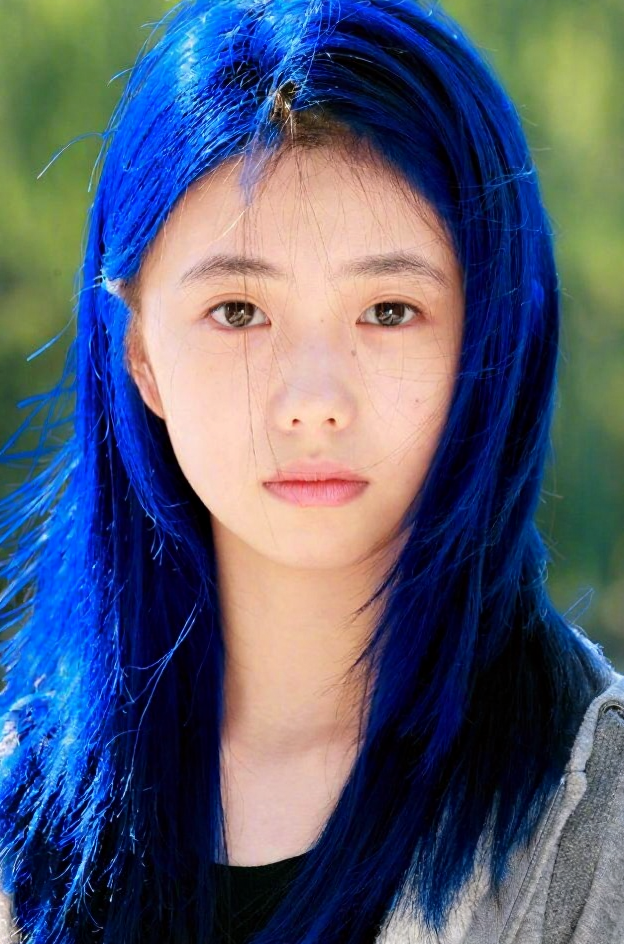

In [11]:
out[0]

## 1.1.2 With Lora Pretrained Weights

In [45]:
LORA_WEIGHT='/raid/lilong/data/experiment/flux-kontext-face_seg_lora_fp16/face_segmentation_lora/v2/checkpoint-199-1000/model.safetensors'
LORA_WEIGHT='/tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/v0/pytorch_lora_weights.safetensors/pytorch_lora_weights.safetensors'
#/tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/v0/pytorch_lora_weights.safetensors'
# LORA_WEIGHT='TsienDragon/qwen-image-edit-lora-face-segmentation'
LORA_WEIGHT='/raid/lilong/data/experiment/flux-kontext-ktp_lora_fp16/ktp_inpaint/v0/checkpoint-12-5900/model.safetensors'

LORA_WEIGHT='TsienDragon/flux-kontext-face-segmentation'
LORA_WEIGHT='/tmp/image_edit_lora/faceSegFluxKontextFp16MultiRes/v0/checkpoint-last-1227-3683-last/pytorch_lora_weights.safetensors'
LORA_WEIGHT='/tmp/image_edit_lora/faceSegFluxKontextFp16/v2/checkpoint-last-151-454-last/pytorch_lora_weights.safetensors'


In [46]:
LORA_WEIGHT

'/tmp/image_edit_lora/faceSegFluxKontextFp16/v2/checkpoint-last-151-454-last/pytorch_lora_weights.safetensors'

In [47]:
config="../../tests/test_configs/test_example_fluxkontext_fp16.yaml"
# config='../../configs/flux_kontext_ktp/ktp_flux_kontext_fp16.yaml'

config = load_config_from_yaml(config)

config.model.lora.pretrained_weight = LORA_WEIGHT
# config.model.pretrained_model_name_or_path='lrzjason/flux-kontext-nf4'
trainer = FluxKontextLoraTrainer(config)


2025-10-17 00:44:42,428 | INFO | src.trainer.base_trainer: Batch Size: 2
2025-10-17 00:44:42,428 | INFO | src.trainer.base_trainer: Use Cache: True
2025-10-17 00:44:42,428 | INFO | root: ImageProcessor initialized with target_size: (832, 576)controls_size: [(832, 576)]target_pixels: Nonecontrols_pixels: None


In [48]:
config.model.pretrained_model_name_or_path

'black-forest-labs/FLUX.1-Kontext-dev'

In [49]:
IMAGE_PATH='https://n.sinaimg.cn/ent/transform/775/w630h945/20201127/cee0-kentcvx8062290.jpg'
prompt='change the image from the face to the face segmentation mask'
prompt_image = load_image(IMAGE_PATH)


In [50]:
prompt_image.size

(630, 945)

In [51]:

out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=945,
    width=630,
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-10-17 00:44:47,618 | INFO | root: Loading model...
2025-10-17 00:44:47,618 | INFO | root: Loading FluxKontextPipeline and separating components...
2025-10-17 00:44:47,619 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext VAE from black-forest-labs/FLUX.1-Kontext-dev
configs {'_class_name': 'AutoencoderKL', '_diffusers_version': '0.34.0.dev0', '_name_or_path': '/raid/.cache/huggingface/models--black-forest-labs--FLUX.1-dev/snapshots/0ef5fff789c832c5c7f4e127f94c8b54bbcced44/vae', 'act_fn': 'silu', 'block_out_channels': [128, 256, 512, 512], 'down_block_types': ['DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D'], 'force_upcast': True, 'in_channels': 3, 'latent_channels': 16, 'latents_mean': None, 'latents_std': None, 'layers_per_block': 2, 'mid_block_add_attention': True, 'norm_num_groups': 32, 'out_channels': 3, 'sample_size': 1024, 'scaling_factor': 0.3611, 'shift_factor': 0.1159, 'up_block_types': ['UpDecoderBlock2D', 'UpDecoderBloc

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00, 53.95it/s]


configs {'_class_name': 'FluxTransformer2DModel', '_diffusers_version': '0.34.0.dev0', '_name_or_path': '../checkpoints/flux-dev/transformer', 'attention_head_dim': 128, 'axes_dims_rope': [16, 56, 56], 'guidance_embeds': True, 'in_channels': 64, 'joint_attention_dim': 4096, 'num_attention_heads': 24, 'num_layers': 19, 'num_single_layers': 38, 'out_channels': None, 'patch_size': 1, 'pooled_projection_dim': 768}


Fetching 3 files: 100%|██████████| 3/3 [00:00<00:00, 46260.71it/s]


guidance_embeds: True


Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00, 26.32it/s]


2025-10-17 00:44:50,552 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext tokenizers from black-forest-labs/FLUX.1-Kontext-dev
2025-10-17 00:44:51,791 | INFO | src.models.flux_kontext_loader: Loading Flux Kontext scheduler from black-forest-labs/FLUX.1-Kontext-dev


Loading pipeline components...:  14%|█▍        | 1/7 [00:00<00:01,  5.47it/s]

configs {'_class_name': 'AutoencoderKL', '_diffusers_version': '0.34.0.dev0', '_name_or_path': '/raid/.cache/huggingface/models--black-forest-labs--FLUX.1-dev/snapshots/0ef5fff789c832c5c7f4e127f94c8b54bbcced44/vae', 'act_fn': 'silu', 'block_out_channels': [128, 256, 512, 512], 'down_block_types': ['DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D', 'DownEncoderBlock2D'], 'force_upcast': True, 'in_channels': 3, 'latent_channels': 16, 'latents_mean': None, 'latents_std': None, 'layers_per_block': 2, 'mid_block_add_attention': True, 'norm_num_groups': 32, 'out_channels': 3, 'sample_size': 1024, 'scaling_factor': 0.3611, 'shift_factor': 0.1159, 'up_block_types': ['UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDecoderBlock2D', 'UpDecoderBlock2D'], 'use_post_quant_conv': False, 'use_quant_conv': False}


Loading pipeline components...:  57%|█████▋    | 4/7 [00:00<00:00, 13.01it/s]

configs {'_class_name': 'FluxTransformer2DModel', '_diffusers_version': '0.34.0.dev0', '_name_or_path': '../checkpoints/flux-dev/transformer', 'attention_head_dim': 128, 'axes_dims_rope': [16, 56, 56], 'guidance_embeds': True, 'in_channels': 64, 'joint_attention_dim': 4096, 'num_attention_heads': 24, 'num_layers': 19, 'num_single_layers': 38, 'out_channels': None, 'patch_size': 1, 'pooled_projection_dim': 768}
guidance_embeds: True


Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.15it/s]

2025-10-17 00:44:53,120 | INFO | src.models.flux_kontext_loader: Successfully loaded Flux Kontext scheduler
2025-10-17 00:44:53,125 | INFO | root: Components loaded successfully. VAE scale factor: 8
2025-10-17 00:44:53,125 | INFO | root: load lora from pretrained weight


2025-10-17 00:44:53,169 | INFO | root: sha256 for pretrained_weight: 27d0fc87afa2720394697e582ffb6f5d73758bf6c8dc36ca262cebfd585c891d
2025-10-17 00:44:53,636 | INFO | root: set_lora: DIFFUSERS Loaded lora from /tmp/image_edit_lora/faceSegFluxKontextFp16/v2/checkpoint-last-151-454-last/pytorch_lora_weights.safetensors for lora_edit
2025-10-17 00:44:53,637 | INFO | root: set_lora: Loaded lora from /tmp/image_edit_lora/faceSegFluxKontextFp16/v2/checkpoint-last-151-454-last/pytorch_lora_weights.safetensors
2025-10-17 00:44:59,668 | INFO | root: setup_model_device_train_mode done


                                    Model Summary: model                                    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Section     ┃ Metric                              ┃ Value                                ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Parameters  │ Total                               │ 11.92B                               │
│ Parameters  │ Trainable                           │ 0                                    │
│ Parameters  │ Trainable %                         │ 0.00%                                │
│ Parameters  │ Memory (total)                      │ 22.20 GB                             │
│ Parameters  │ Memory (trainable)                  │ 0 B                                  │
│ Modules     │ Total                               │ 3178                                 │
│ Modules     │ Leaf                                │ 2088                                 │
│ Modules     │ Parameterized                       │ 1036                                 │
│ Transformer │ Attention blocks (total/self/cross) │ 57/57/0                              │
│ Transformer │ Heads (hist)                        │ 24×57                                │
│ Transformer │ Attn hidden dim (hist)              │ 3072×57                              │
│ Transformer │ Norms                               │ LayerNorm×115, RMSNorm×152           │
│ Transformer │ FeedForward blocks                  │ 349                                  │
│ LoRA        │ Blocks                              │ 380                                  │
│ LoRA        │ Parameters                          │ 18.68M                               │
│ LoRA        │ Params % of total                   │ 0.16%                                │
│ LoRA        │ Ranks (hist)                        │ r=16×380                             │
│ LoRA        │ Rank min/max                        │ 16 / 16                              │
│ DTypes      │ dtype                               │ params(total/train) | % | mem(total) │
│ DTypes      │ bf16                                │ 11.92B/0 | 100.00% | 22.20 GB        │
└─────────────┴─────────────────────────────────────┴──────────────────────────────────────┘

2025-10-17 00:44:59,748 | INFO | root: setup_predict done
2025-10-17 00:44:59,749 | INFO | root: Start predict
2025-10-17 00:44:59,749 | INFO | root: image size format [H,W]
use native size [[944, 624]]
controls_size [[944, 624]]
2025-10-17 00:44:59,762 | INFO | root: ##################################################
2025-10-17 00:44:59,763 | INFO | root: image shapes for controls: [[944, 624]]
2025-10-17 00:44:59,764 | INFO | root: image shape for target: [944, 624]
data keys dict_keys(['control', 'prompt', 'n_controls', 'negative_prompt', 'num_inference_steps', 'height', 'width', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
height <class 'int'>
width <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'float'>
calculate shift 2301 256 4096 0.5 1.15


Flux Kontext Generation: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]


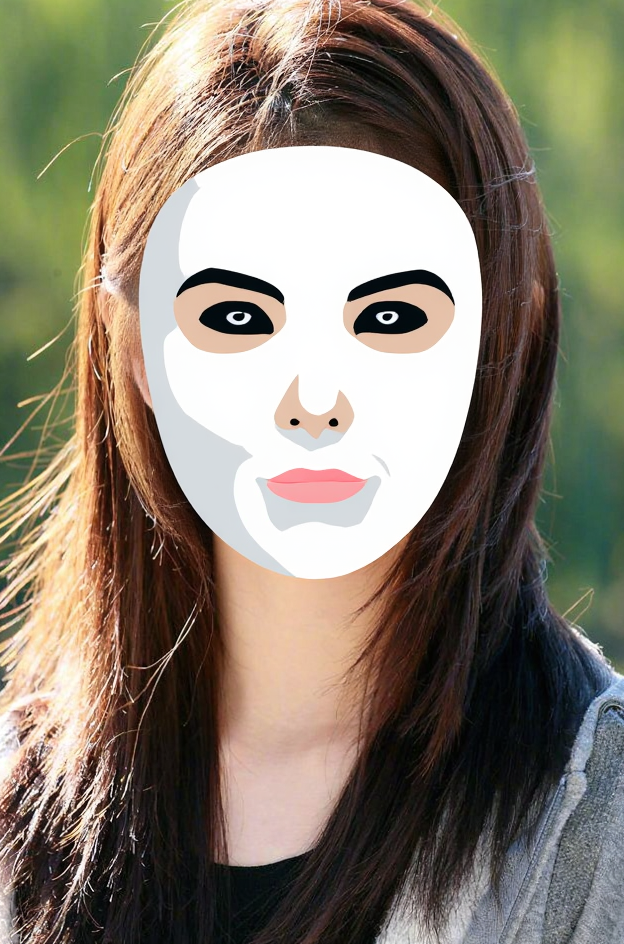

In [53]:
out[0]

In [35]:
# lora_weight_folder = "/raid/lilong/data/experiment/flux-kontext-ktp_lora_fp16/ktp_inpaint/v0/"
# trainer.save_lora(lora_weight_folder, adapter_name="lora_edit")

## 1.2 Multi Control

In [4]:
from PIL import Image

def pad_to_square(img: Image.Image, fill=None):
    """Pad to square without resizing; centered content.
    fill: background color.
          - For RGB: (r,g,b) e.g. (255,255,255)
          - For RGBA: (r,g,b,a) e.g. (255,255,255,0) to keep transparency
          - If None: auto-choose (transparent if RGBA, white otherwise)
    """
    w, h = img.size
    side = max(w, h)

    if img.mode == "RGBA":
        bg_color = (255, 255, 255, 0) if fill is None else fill
        background = Image.new("RGBA", (side, side), bg_color)
    else:
        bg_color = (255, 255, 255) if fill is None else fill
        # convert to RGB if palette/L, etc., so fill works as expected
        if img.mode not in ("RGB", "L"):
            img = img.convert("RGB")
        background = Image.new(background_mode := ("L" if img.mode == "L" else "RGB"),
                               (side, side), bg_color)

    offset = ((side - w) // 2, (side - h) // 2)
    background.paste(img, offset)
    return background



In [39]:
from PIL import Image, ImageOps

def add_white_padding(img: Image.Image, padding, background=(255, 255, 255)) -> Image.Image:
    """
    Add white (or any color) padding around an image.
    - padding: int for symmetric pixels on all sides, or
               tuple (left, top, right, bottom).
    - Handles RGBA by flattening onto a white background first.
    """
    if img.mode in ("RGBA", "LA"):
        # Flatten transparency over white
        bg = Image.new("RGB", img.size, background)
        if img.mode != "RGBA":
            img = img.convert("RGBA")
        bg.paste(img, mask=img.split()[-1])
        base = bg
    else:
        base = img.convert("RGB")
    return ImageOps.expand(base, border=padding, fill=background)

\
# padded_sym = add_white_padding(im, 60)  # 60px on all sides
# padded_asym = add_white_padding(im, (40, 80, 40, 80))  # L,T,R,B



In [5]:
LORA_WEIGHT='/tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/v0/checkpoint-549-1100/model.safetensors'
LORA_WEIGHT='/tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/pytorch_lora_weights.safetensors'
LORA_WEIGHT='TsienDragon/flux-kontext-character-composition'
config="../../tests/test_configs/test_example_fluxkontext_fp16_character_composition.yaml"
config = load_config_from_yaml(config)
config.model.lora.pretrained_weight = LORA_WEIGHT
trainer = FluxKontextLoraTrainer(config)

2025-09-18 17:44:56,425 | INFO | src.trainer.base_trainer: Batch Size: 16
2025-09-18 17:44:56,425 | INFO | src.trainer.base_trainer: Use Cache: True


2025-09-18 17:44:56,427 | INFO | root: ImageProcessor initialized with target_size: (384, 672)controls_size: [(384, 672), (512, 512)]


In [77]:
import requests
from io import BytesIO
from PIL import Image
# control_1 = load_image('https://cdn.shopify.com/s/files/1/0705/5491/0959/files/100_dfdf593d-bc73-4bb5-8d23-9181d510f628_480x480.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl_control_1.webp')
# control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small_control_1.png')
control_1 = load_image('/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog_control_1.webp')

In [78]:
control_1.size

(1024, 1024)

In [79]:
import requests
from PIL import Image
from io import BytesIO

image_file="https://cdna.artstation.com/p/assets/images/images/027/134/318/large/pang-ying-ep03-scene-sc037.jpg?1590684056"
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/scene_girl.png'
image_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_honey_small.webp'
iamge_file = '/mnt/nas/public2/lilong/data/openimages/character_composition/test/control/living_room_dog.webp'
prompt_image = load_image(image_file).convert('RGB')

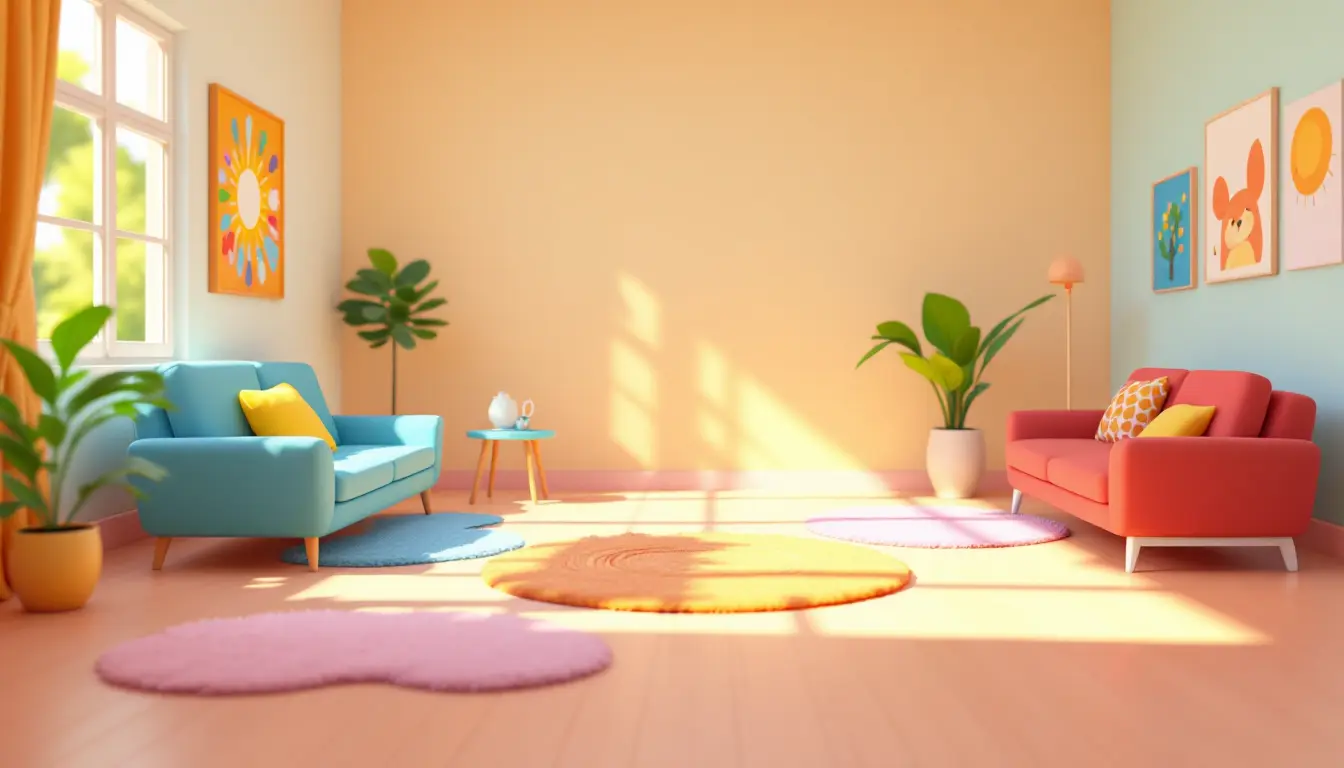

In [80]:
prompt_image

In [81]:
control_1 = control_1.resize((160,160))
control_1 = add_white_padding(control_1, (64, 64, 160, 160))

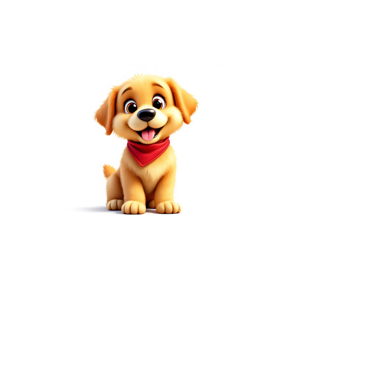

In [82]:
control_1

In [83]:
prompt='Add the character to the image'
prompt

'Add the character to the image'

In [84]:
out = trainer.predict(
    prompt_image=prompt_image,
    prompt=prompt,
    num_inference_steps=20,
    true_cfg_scale=1.0,
    negative_prompt="",
    weight_dtype=torch.bfloat16,
    height=384,
    width=672,
    controls_size=[[384,672],[512,512]],
    additional_controls=[[control_1]],
    output_type='pil'
)
# save_path = 'tests/test_flux_kontext_trainer.png'
# save_path = os.path.abspath(save_path)

2025-09-18 17:58:36,358 | INFO | root: Start predict
2025-09-18 17:58:36,359 | INFO | root: image size format [H,W]
2025-09-18 17:58:36,360 | INFO | root: ##################################################
2025-09-18 17:58:36,360 | INFO | root: image shapes for controls: [[384, 672], [512, 512]]
2025-09-18 17:58:36,361 | INFO | root: image shape for target: [384, 672]
control_1 <class 'list'> <class 'torch.Tensor'> <class 'torch.Tensor'>
new controls torch.Size([1, 3, 512, 512]) control_1
data keys dict_keys(['control', 'prompt', 'control_1', 'n_controls', 'negative_prompt', 'num_inference_steps', 'height', 'width', 'true_cfg_scale', 'guidance'])
control <class 'torch.Tensor'>
prompt <class 'list'>
control_1 <class 'torch.Tensor'>
n_controls <class 'int'>
negative_prompt <class 'list'>
num_inference_steps <class 'int'>
height <class 'int'>
width <class 'int'>
true_cfg_scale <class 'float'>
guidance <class 'float'>
additional_control_key <class 'torch.Tensor'> control_1
calculate shift 

Flux Kontext Generation: 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]


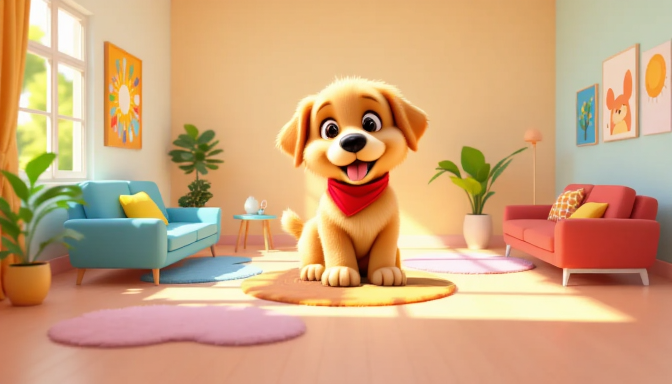

In [85]:
out[0]
# 0b92dc643791caf0eaa3b5c6936c03284eb85336cd70d1b939ec8c5f20f4ac55

In [76]:
out[0].size

(672, 384)

In [ ]:
# lora_weight = "/tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/"
# trainer.save_lora(lora_weight, adapter_name="lora_edit")

2025-09-18 16:37:15,904 | INFO | root: Saved LoRA weights to /tmp/image_edit_lora/character_composition_fp16/characterCompositionFluxKontextFp16/
